In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import os

In [17]:
Data = pd.read_csv('/kaggle/input/weather-images-32x32/WeatherPixels32x32.csv')

In [18]:
dataset = '../input/weather-dataset/dataset/'
labels = sorted(os.listdir(dataset))
label = []
for i in labels:
    st = dataset + i
    for j in os.listdir(st):
        stg = st +"/"+ j
        label.append(i)
#Data['labels'] = label

In [19]:
new_labels = {
    'Rainy': ['rain', 'hail', 'lightning','rainbow'],
    'Dusty': ['sandstorm', 'fogsmog'],
    'Cold': ['dew', 'glaze', 'rime', 'snow', 'frost']
}

Target = []
for l in label:
    if l in new_labels['Rainy']:
        Target.append('Rainy')
    elif l in new_labels['Dusty']:
        Target.append('Dusty')
    elif l in new_labels['Cold']:
        Target.append('Cold')
        
Data['Target'] = Target

In [20]:
Data = shuffle(Data)

In [21]:
X = Data.drop('Target', axis=1)
y = Data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [22]:
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5060709082078679


In [24]:
#clf = SVC(kernel='rbf', C=1, gamma='scale')
clf = SVC(kernel='linear', C=1, gamma='scale')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.38125303545410394


In [20]:
dataset = '../input/weather-dataset/dataset/'
labels = sorted(os.listdir(dataset))
image = []
label = []
for i in labels:
    st = dataset + i
    for j in os.listdir(st):
        stg = st +"/"+ j
        label.append(i)
        image.append(stg)
        
WeatherData = pd.DataFrame({'label':label, 'path' : image}, columns = ['label', 'path'])

In [21]:
new_labels = {
    'Rainy': ['rain', 'hail', 'lightning','rainbow'],
    'Dusty': ['sandstorm', 'fogsmog'],
    'Cold': ['dew', 'glaze', 'rime', 'snow', 'frost']
}

Target = []
for l in label:
    if l in new_labels['Rainy']:
        Target.append('Rainy')
    elif l in new_labels['Dusty']:
        Target.append('Dusty')
    elif l in new_labels['Cold']:
        Target.append('Cold')
        
WeatherData['Target'] = Target

In [22]:
WeatherData.drop([50, 67, 94, 139], inplace=True)
WeatherData['Target'].value_counts()

Cold     3589
Rainy    1726
Dusty    1543
Name: Target, dtype: int64

In [23]:
WeatherData['image'] = WeatherData['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75), Image.LANCZOS).convert('RGB')))

In [7]:
#WeatherData['image'] = WeatherData['image'].map(lambda x: np.asarray(sobel(x)))

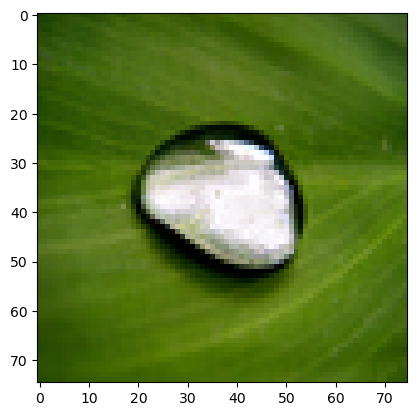

In [24]:
plt.imshow(WeatherData['image'][0])

In [25]:
WeatherData = shuffle(WeatherData)

In [26]:
Features = np.stack(WeatherData['image'].values)
Target = WeatherData['label']

In [27]:
from tensorflow.keras.utils import to_categorical
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(Features, Target, test_size=0.2,random_state=666, stratify=WeatherData['Target'])
x_train = np.asarray(x_train_o.tolist())
x_test = np.asarray(x_test_o.tolist())
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)
x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_o = label_encoder.fit_transform(y_train_o)
y_test_o = label_encoder.transform(y_test_o)
y_train = to_categorical(y_train_o, num_classes = 11)
y_test = to_categorical(y_test_o, num_classes = 11)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999, stratify=y_train)

In [29]:
x_train = x_train.reshape(x_train.shape[0], *(75, 75, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 75, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 75, 3))

In [30]:
input_shape = (75, 75, 3)
num_classes = 11

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       256       
 hNormalization)                                                 
                                                                 
 average_pooling2d (AverageP  (None, 37, 37, 64)       0         
 ooling2D)                                                       
                                                        

In [31]:
optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8, amsgrad=False)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=4, verbose=1, factor=0.5, min_lr=0.00001)

#Data Generation
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range = 10) 
datagen.fit(x_train)

In [32]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(datagen.flow(x_train,y_train, batch_size=64),
                              epochs = 150, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 64
                              , callbacks=[learning_rate_reduction])

Epoch 1/150


2023-04-13 23:01:30.316283: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 [==============================] - 25s 138ms/step - loss: 1.7947 - accuracy: 0.4309 - val_loss: 2.2073 - val_accuracy: 0.2623 - lr: 0.0010
Epoch 2/150
77/77 [==============================] - 10s 124ms/step - loss: 1.5084 - accuracy: 0.5042 - val_loss: 1.8497 - val_accuracy: 0.3752 - lr: 0.0010
Epoch 3/150
77/77 [==============================] - 9s 118ms/step - loss: 1.3906 - accuracy: 0.5331 - val_loss: 2.4921 - val_accuracy: 0.3169 - lr: 0.0010
Epoch 4/150
77/77 [==============================] - 9s 119ms/step - loss: 1.3181 - accuracy: 0.5582 - val_loss: 1.6945 - val_accuracy: 0.4426 - lr: 0.0010
Epoch 5/150
77/77 [==============================] - 9s 116ms/step - loss: 1.2582 - accuracy: 0.5762 - val_loss: 1.4986 - val_accuracy: 0.4845 - lr: 0.0010
Epoch 6/150
77/77 [==============================] - 9s 117ms/step - loss: 1.2455 - accuracy: 0.5709 - val_loss: 1.5164 - val_accuracy: 0.5191 - lr: 0.0010
Epoch 7/150
77/77 [==============================] - 9s 118ms/step - loss:

In [47]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
predictions = model.predict(x_test)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=0)
loss_t, accuracy_t = model.evaluate(x_train, y_train, verbose=0)
print("CNN Training: accuracy = %f" % (accuracy_t))
print("CNN Validation: accuracy = %f" % (accuracy_v))
print("CNN Test: accuracy = %f" % (accuracy))

43/43 [==============================] - 0s 6ms/step
CNN Training: accuracy = 0.788536
CNN Validation: accuracy = 0.730419
CNN Test: accuracy = 0.709913


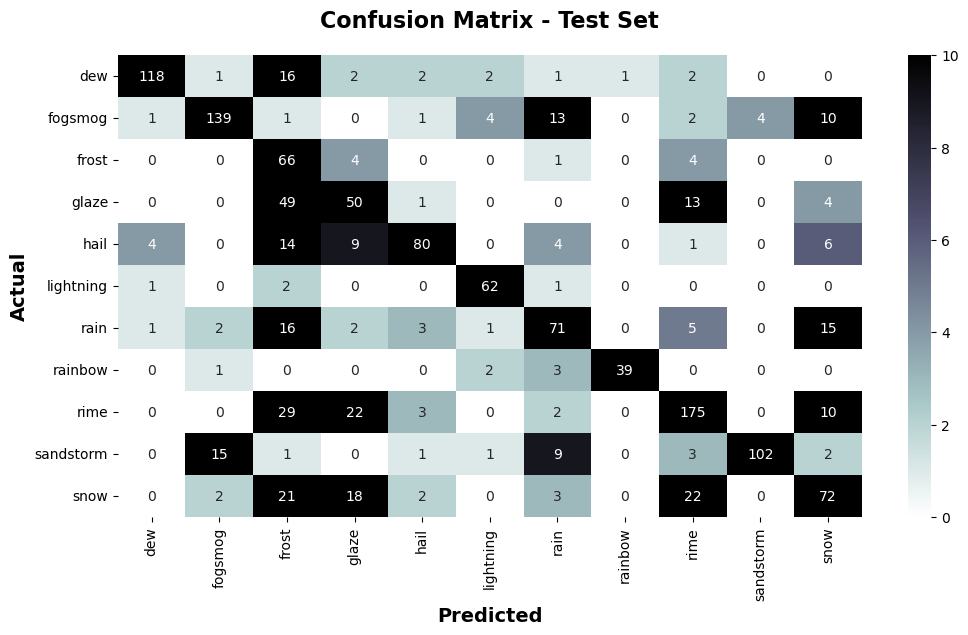

In [48]:
predictions = np.array(list(map(lambda x: np.argmax(x), predictions)))
categories = ['dew','fogsmog', 'frost', 'glaze','hail','lightning','rain', 'rainbow','rime','sandstorm','snow']

CMatrix = pd.DataFrame(confusion_matrix(y_test_o, predictions), columns=categories, index =categories)
plt.figure(figsize=(12, 6)) 
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 10,cmap = 'bone_r') 
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold') 
ax.set_xticklabels(ax.get_xticklabels(),rotation =90); 
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);
plt.show()

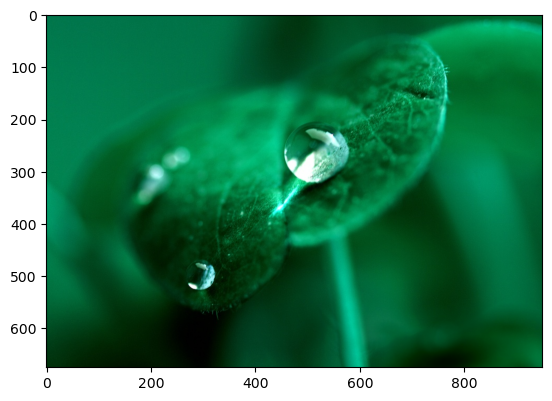

1/1 [==============================] - 0s 25ms/step

dew


In [59]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image
from PIL import Image, ImageFilter
img = cv2.imread("/kaggle/input/weather-dataset/dataset/dew/2208.jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img, (75, 75))
img=img.reshape(1, 75, 75, 3)
result = model.predict(img)

print()
max_prob = np.argmax(result[0])
print(categories[max_prob])


In [49]:
from sklearn.metrics import classification_report

# Get predictions for the test set
y_pred = model.predict(x_test)

# Convert the one-hot encoded labels to their categorical representation
y_test_cat = np.argmax(y_test, axis=1)
y_pred_cat = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test_cat, y_pred_cat))

43/43 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       145
           1       0.87      0.79      0.83       175
           2       0.31      0.88      0.46        75
           3       0.47      0.43      0.45       117
           4       0.86      0.68      0.76       118
           5       0.86      0.94      0.90        66
           6       0.66      0.61      0.63       116
           7       0.97      0.87      0.92        45
           8       0.77      0.73      0.75       241
           9       0.96      0.76      0.85       134
          10       0.61      0.51      0.56       140

    accuracy                           0.71      1372
   macro avg       0.75      0.73      0.72      1372
weighted avg       0.76      0.71      0.72      1372



In [60]:
model.save('my_model.h5')